In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import datetime

In [163]:
# url = "/Users/i354746/private/magisterka/data.csv"
url = "/Users/i354746/private/magisterka/datasets/eurusd-m15-2018/EURUSD.csv"
df = pd.read_csv(url)
df["Timestamp"] = df["Date"].astype(str) + " " + df["Timestamp"]
df.drop("Date", 1, inplace=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True).astype(int)
df["Timestamp"] = df["Timestamp"]/1000000000
df.set_index('Timestamp', inplace=True)


training_set = df.iloc[:, 2:3].values

In [164]:
times=sorted(df.index.values)
last_10pct=times[-int(0.1*len(times))]
print(last_10pct, datetime.datetime.fromtimestamp(last_10pct))

validation_df=df[(df.index >= last_10pct)]
df=df[(df.index < last_10pct)]

training_set = df.iloc[:, 2:3].values

1564050600.0 2019-07-25 12:30:00


In [165]:
df.head()

,Open,High,Low,Close,Volume
Timestamp,,,,,
1.422223e+09,1.11521,1.11562,1.11378,1.11380,767.030002
1.422224e+09,1.11380,1.11447,1.11354,1.11422,775.439999
1.422225e+09,1.11426,1.11491,1.11413,1.11482,601.629998
1.422226e+09,1.11483,1.11485,1.11422,1.11430,629.209997
1.422227e+09,1.11438,1.11489,1.11397,1.11425,1674.320000


In [166]:
print(training_set.shape)

(112180, 1)


In [167]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [168]:
SEQ_LEN=60

X_train = []
y_train = []
for i in range(SEQ_LEN, training_set_scaled.size-1):
    X_train.append(training_set_scaled[i-SEQ_LEN:i, 0])
    y_train.append(training_set_scaled[i+1, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train[0])



X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

[0.36169441 0.36060592 0.36328178 0.36368996 0.36255612 0.35561703
 0.3487233  0.34359835 0.36183047 0.37874734 0.37371309 0.37112794
 0.3738038  0.37670643 0.37316885 0.37579936 0.37335027 0.37289673
 0.37248855 0.36790784 0.36908703 0.37239784 0.37579936 0.37666107
 0.37879269 0.37793097 0.37688784 0.37720532 0.37738673 0.38019865
 0.37929158 0.38228491 0.38332804 0.38568643 0.38618531 0.39085673
 0.39239875 0.38740986 0.3878634  0.39403148 0.39684339 0.40069844
 0.39920178 0.40087986 0.40087986 0.40836319 0.4104041  0.41022269
 0.40600481 0.40804572 0.40387319 0.40196834 0.40264865 0.40251259
 0.40237653 0.40097057 0.39965531 0.40124269 0.40360107 0.40151481]


In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [170]:

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [171]:
# import time

# model = Sequential()

# model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50,return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# model.add(Dense(units=1))

# opt = Adam(lr=0.001, decay=1e-6)

# NAME = f"PRED-{int(time.time())}"  
# tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# model.compile(optimizer=opt,loss='mean_squared_error')

# model.fit(X_train,y_train,epochs=10,batch_size=32, callbacks=[tensorboard],validation_data=[X_test, y_test])

# model.save('my_model+1.h5')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffd89009590>,
      dtype=object)

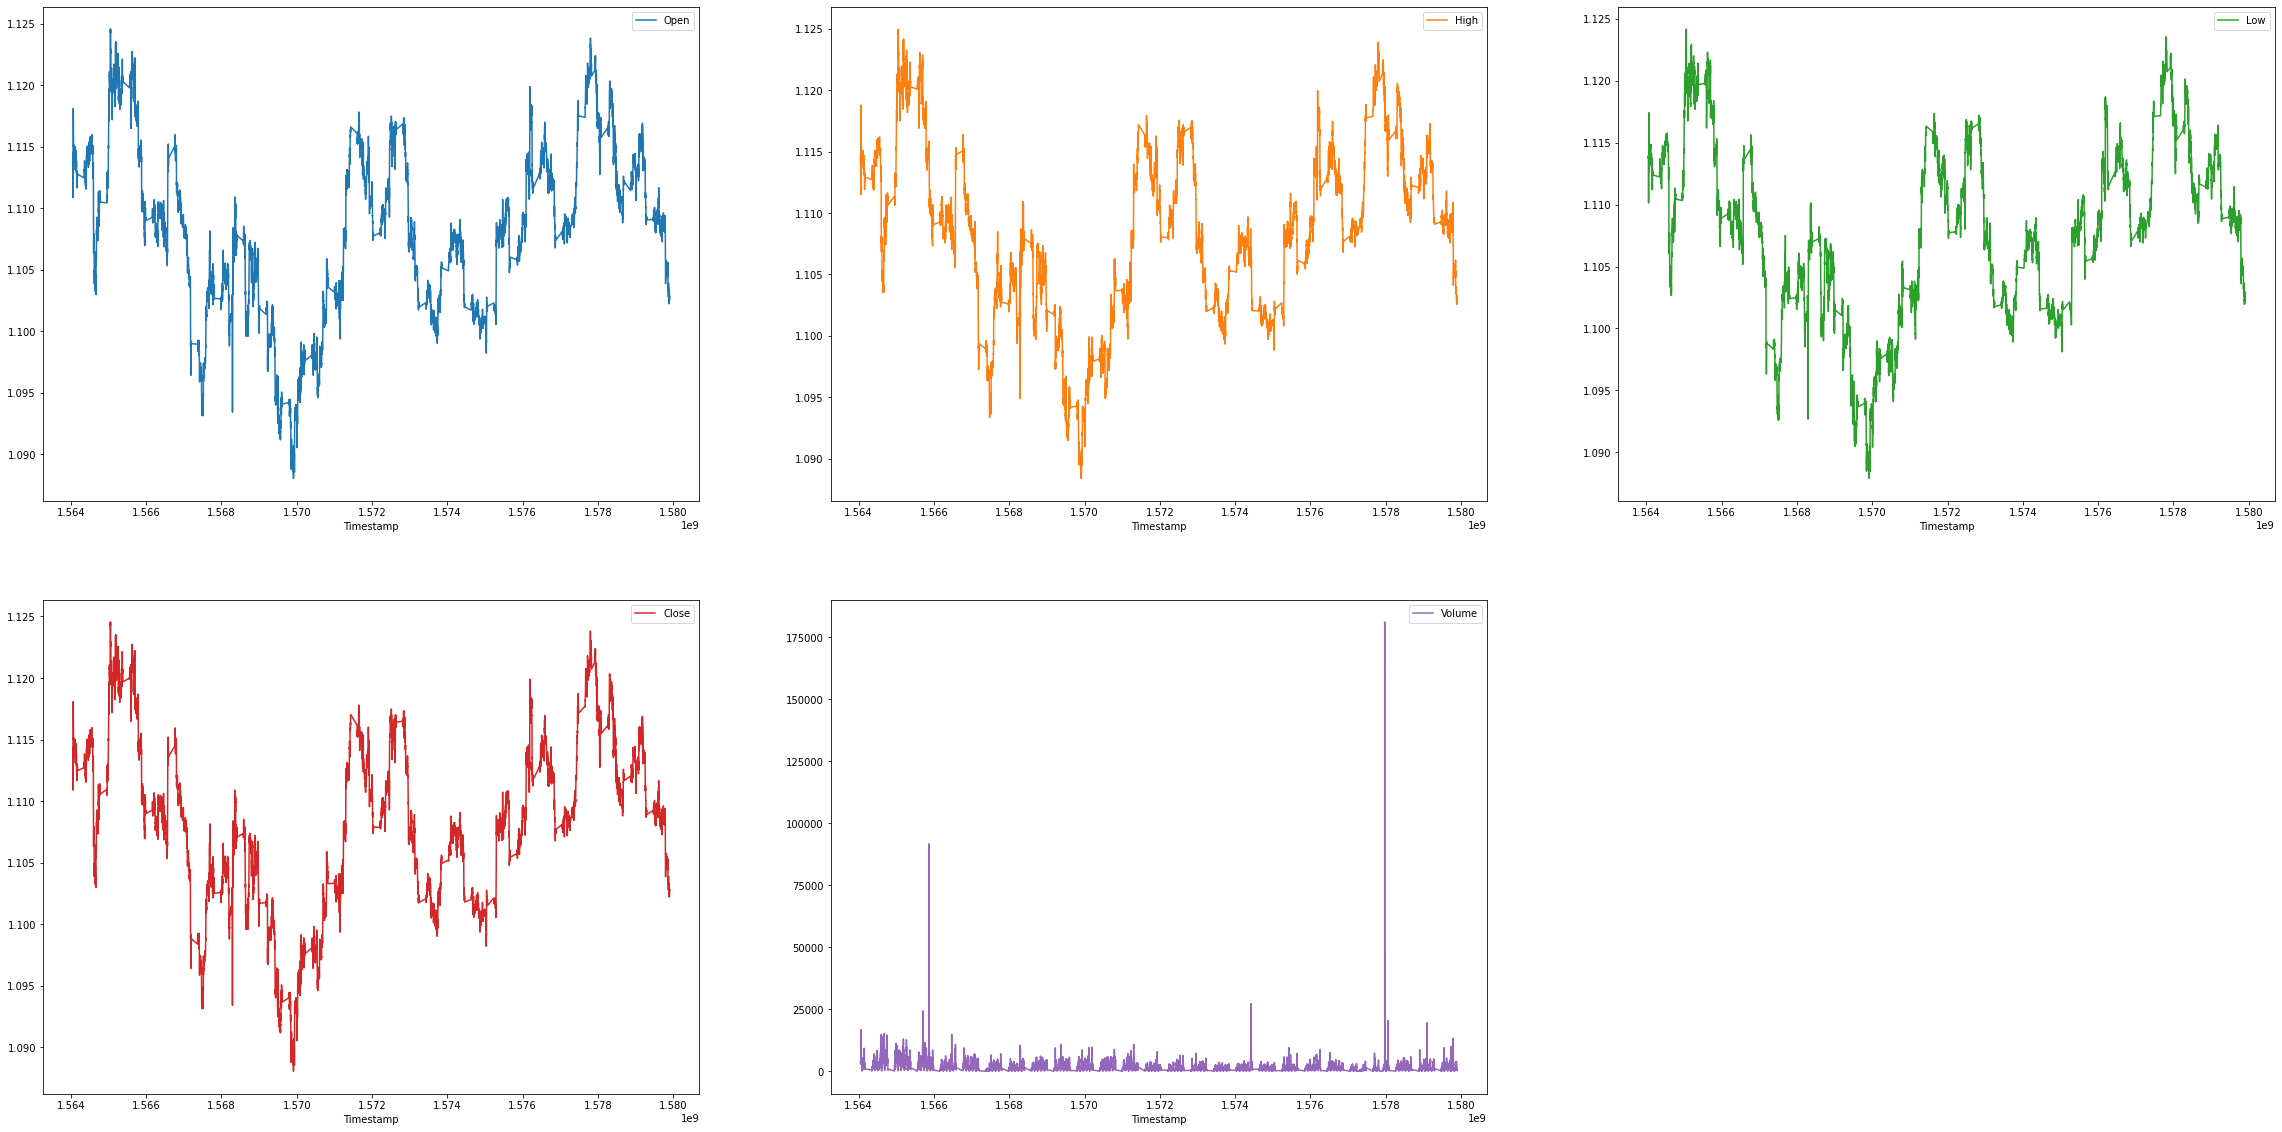

In [172]:
validation_df.plot(subplots=True, layout=(2, 3), figsize=(40, 20), sharex=False) 

In [173]:
loaded_model=load_model("/Users/i354746/private/magisterka/my_model.h5")

# score = loaded_model.evaluate(X_test, y_test, verbose=1)
# print(score)

In [174]:
validation_set = validation_df.iloc[:, 3].values
validation_set= validation_set.reshape(-1,1)
sc_validation = MinMaxScaler(feature_range=(0,1))
validation_set_scaled = sc_validation.fit_transform(validation_set)

In [175]:
SEQ_LEN=60

validation_seq = []

for i in range(SEQ_LEN, validation_set_scaled.size-1):
    validation_seq.append(validation_set_scaled[i-SEQ_LEN:i, 0])
validation_seq = np.array(validation_seq)

print(validation_seq[0])

validation_pred = np.reshape(validation_seq, (validation_seq.shape[0], validation_seq.shape[1], 1))

[0.7169863  0.71041096 0.71041096 0.72082192 0.71013699 0.64109589
 0.64219178 0.6260274  0.65863014 0.75068493 0.76383562 0.78
 0.78328767 0.8230137  0.8109589  0.79808219 0.78684932 0.76657534
 0.75671233 0.76109589 0.75753425 0.75232877 0.73890411 0.74273973
 0.71342466 0.69287671 0.68657534 0.70712329 0.71068493 0.72465753
 0.73041096 0.72876712 0.72027397 0.72273973 0.73123288 0.72164384
 0.72410959 0.72328767 0.72657534 0.72712329 0.72575342 0.72821918
 0.72794521 0.73068493 0.7309589  0.73178082 0.7290411  0.72958904
 0.72794521 0.72876712 0.72794521 0.7309589  0.72821918 0.72438356
 0.72794521 0.73369863 0.73342466 0.72876712 0.73232877 0.73863014]


In [176]:
data=loaded_model.predict(validation_pred)
data = [x[0] for x in data]

pred
0  0.724015
1  0.724225
2  0.724307
3  0.724311
4  0.724512


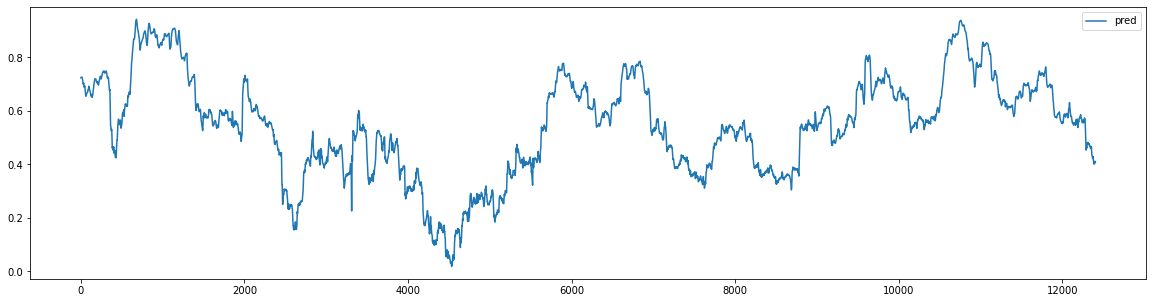

In [177]:
# cp= validation_df.copy()
wah=pd.DataFrame(np.array(data), columns=["pred"])
print(wah.head())
wah.plot(figsize=(20, 5)) 


In [178]:
print(validation_set_scaled.size)

12464


In [ ]:
pd.DataFrame(validation_pred[0]).plot(figsize=(20, 5)) 

In [179]:
chain_predict = np.array([validation_pred[0]])

output=[]

for i in range(SEQ_LEN,3500): #validation_set_scaled.size-3validation_set_scaled.size-3
    if i%3000==0:
        print(i)
    pred_val=loaded_model.predict(chain_predict)
    output.append(pred_val)

    stitched=np.concatenate((np.array(chain_predict[0][1:]),np.array(pred_val)))
    chain_predict=np.array([stitched])

3000


In [180]:
output=np.array(output)


In [181]:
print(output[1][0][0])
output = [x[0][0] for x in output]

0.7238126


pred
0  0.724015
1  0.723813
2  0.723049
3  0.721910
4  0.720633


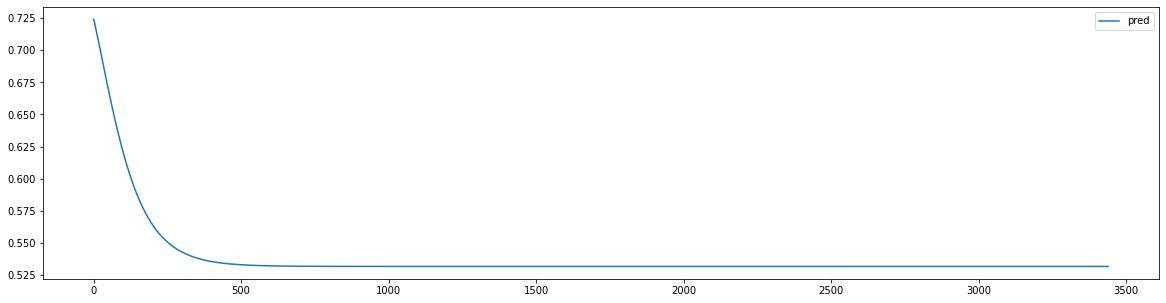

In [182]:
wooohooooo=pd.DataFrame(np.array(output), columns=["pred"])
print(wooohooooo.head())
wooohooooo.plot(figsize=(20, 5)) 